In [20]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

In [21]:
# Load dataset
data = pd.read_csv("Dataset/diabetes_normalisasi.csv")
data_train = data #Menggunakan semua dataset sebagai data train
data_test  = data.iloc[-10:,:]

In [22]:
# Variabel yang digunakan setelah seleksi variabel
x = data_train[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']].values
y = data_train['Outcome'].values

In [23]:
x

array([[0.35294118, 0.74371859, 0.59016393, 0.50074516, 0.23441503],
       [0.05882353, 0.42713568, 0.54098361, 0.39642325, 0.11656704],
       [0.47058824, 0.91959799, 0.52459016, 0.34724292, 0.25362938],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, 0.390462  , 0.07130658],
       [0.05882353, 0.63316583, 0.49180328, 0.4485842 , 0.11571307],
       [0.05882353, 0.46733668, 0.57377049, 0.45305514, 0.10119556]])

In [24]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [25]:
#-------------------------------------
#- inisiasi

input       = x
target      = y
num_input   = 5
net_hidden1 = 25
net_hidden2 = 50
num_output  = 1

In [26]:
# Fungsi Sigmoid
def sigmoid(x):
  return 1/(1+np.exp(-x))
sig = np.vectorize(sigmoid)

In [27]:
# Inisialisasi Bobot

#Input-->Hidden Layer1
w_hidden1 = np.random.uniform(low=0, high=0, size=(num_input,net_hidden1))
b_hidden1 = np.random.uniform(low=0, high=0, size=(net_hidden1))
#Hidden Layer1-->Hidden Layer2
w_hidden2 = np.random.uniform(low=0, high=0, size=(net_hidden1,net_hidden2))
b_hidden2 = np.random.uniform(low=0, high=0, size=(net_hidden2))
#Hidden Layer2-->Output
w_output = np.random.uniform(low=0, high=0, size=(net_hidden2,num_output))
b_output = np.random.uniform(low=0, high=0, size=(num_output))

# Loss dan Akurasi
loss_values = []
acc_values  = []

lr     = 0.1
epochs = 1000

In [28]:
list_w_hidden1 = []
list_w_hidden2 = []
list_w_output  = []
list_b_hidden1 = []
list_b_hidden2 = []
list_b_output  = []

for epoch in range(epochs):
    MSE = 0
    new_target = np.zeros(len(target))
    for idx, inp in enumerate(input):
        # A. Feedforward
        # Hidden Layer1
        o_hidden1 = np.matmul(input[idx], w_hidden1) + b_hidden1
        o_hidden1 = sig(o_hidden1)
        # Hidden Layer2
        o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
        o_hidden2 = sig(o_hidden2)
        # Outpur Layer
        o_output  = np.matmul(o_hidden2, w_output) + b_output
        o_output  = sig(o_output)
        # Menghitung Error
        error     = target[idx] - o_output
        MSE       = MSE + (error*error)
        new_target[idx] = o_output.round()
        # Error hidden2->output
        eh2       = error @ w_output.T
        # Error hidden1->output 
        eh1       = eh2   @ w_hidden2.T
        
        # B. Backpropagation
        # Outpur Layer
        w_output = w_output + (lr * ((error * o_output * (1 - o_output))* o_hidden2[np.newaxis].T))
        b_output = b_output + (lr * ((error * o_output * (1 - o_output))))
        # Hidden Layer2
        w_hidden2 = w_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2))* o_hidden1[np.newaxis].T)
        b_hidden2 = b_hidden2 + (lr * (eh2 * o_hidden2 * (1 - o_hidden2)))
        # Hidden Layer1
        w_hidden1 = w_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1))* input[idx][np.newaxis].T)
        b_hidden1 = b_hidden1 + (lr * (eh1 * o_hidden1 * (1 - o_hidden1)))
    
    MSE = MSE/len(target)
    acc = 1 - (np.sum(np.absolute(target-new_target))/len(target))
    loss_values.append(MSE)
    acc_values.append(acc)
    print("epoch : ",epoch," | error : ",MSE," | acc : ",acc)
    list_w_hidden1.append(w_hidden1)
    list_w_hidden2.append(w_hidden2)
    list_w_output.append(w_output)
    list_b_hidden1.append(b_hidden1)
    list_b_hidden2.append(b_hidden2)
    list_b_output.append(b_output)
    
acc_max   = max(acc_values)
index_max = acc_values.index(acc_max)
w_hidden1 = list_w_hidden1[index_max]
w_hidden2 = list_w_hidden2[index_max]
w_output  = list_w_output[index_max]
b_hidden1 = list_b_hidden1[index_max]
b_hidden2 = list_b_hidden2[index_max]
b_output  = list_b_output[index_max]

epoch :  0  | error :  [0.2317959]  | acc :  0.6328125
epoch :  1  | error :  [0.23073863]  | acc :  0.640625
epoch :  2  | error :  [0.22960433]  | acc :  0.6471354166666667
epoch :  3  | error :  [0.22856804]  | acc :  0.6497395833333333
epoch :  4  | error :  [0.22758519]  | acc :  0.6471354166666667
epoch :  5  | error :  [0.2265941]  | acc :  0.6484375
epoch :  6  | error :  [0.22550125]  | acc :  0.6497395833333333
epoch :  7  | error :  [0.22420557]  | acc :  0.6510416666666667
epoch :  8  | error :  [0.22259588]  | acc :  0.6510416666666667
epoch :  9  | error :  [0.22046874]  | acc :  0.6510416666666667
epoch :  10  | error :  [0.21744422]  | acc :  0.6510416666666667
epoch :  11  | error :  [0.21298399]  | acc :  0.6510416666666667
epoch :  12  | error :  [0.20661835]  | acc :  0.65625
epoch :  13  | error :  [0.19842575]  | acc :  0.66796875
epoch :  14  | error :  [0.18937823]  | acc :  0.6966145833333333
epoch :  15  | error :  [0.1809448]  | acc :  0.7330729166666667
epoc

epoch :  131  | error :  [0.16783891]  | acc :  0.7721354166666666
epoch :  132  | error :  [0.16796734]  | acc :  0.7721354166666666
epoch :  133  | error :  [0.16809043]  | acc :  0.76953125
epoch :  134  | error :  [0.16820828]  | acc :  0.76953125
epoch :  135  | error :  [0.16832102]  | acc :  0.76953125
epoch :  136  | error :  [0.16842878]  | acc :  0.76953125
epoch :  137  | error :  [0.16853172]  | acc :  0.76953125
epoch :  138  | error :  [0.16862999]  | acc :  0.76953125
epoch :  139  | error :  [0.16872377]  | acc :  0.76953125
epoch :  140  | error :  [0.16881322]  | acc :  0.76953125
epoch :  141  | error :  [0.16889851]  | acc :  0.76953125
epoch :  142  | error :  [0.16897982]  | acc :  0.7682291666666666
epoch :  143  | error :  [0.16905731]  | acc :  0.7682291666666666
epoch :  144  | error :  [0.16913115]  | acc :  0.7682291666666666
epoch :  145  | error :  [0.1692015]  | acc :  0.76953125
epoch :  146  | error :  [0.16926852]  | acc :  0.76953125
epoch :  147  | e

epoch :  258  | error :  [0.16981414]  | acc :  0.7552083333333334
epoch :  259  | error :  [0.16980636]  | acc :  0.7552083333333334
epoch :  260  | error :  [0.16979875]  | acc :  0.7552083333333334
epoch :  261  | error :  [0.16979132]  | acc :  0.7552083333333334
epoch :  262  | error :  [0.16978406]  | acc :  0.7552083333333334
epoch :  263  | error :  [0.16977699]  | acc :  0.7552083333333334
epoch :  264  | error :  [0.16977011]  | acc :  0.7552083333333334
epoch :  265  | error :  [0.16976341]  | acc :  0.7552083333333334
epoch :  266  | error :  [0.16975691]  | acc :  0.7552083333333334
epoch :  267  | error :  [0.1697506]  | acc :  0.7552083333333334
epoch :  268  | error :  [0.16974449]  | acc :  0.7552083333333334
epoch :  269  | error :  [0.16973858]  | acc :  0.7552083333333334
epoch :  270  | error :  [0.16973287]  | acc :  0.7552083333333334
epoch :  271  | error :  [0.16972737]  | acc :  0.7552083333333334
epoch :  272  | error :  [0.16972207]  | acc :  0.7552083333333

epoch :  383  | error :  [0.17008618]  | acc :  0.7486979166666667
epoch :  384  | error :  [0.17009328]  | acc :  0.7486979166666667
epoch :  385  | error :  [0.17010039]  | acc :  0.7486979166666667
epoch :  386  | error :  [0.1701075]  | acc :  0.7486979166666667
epoch :  387  | error :  [0.17011461]  | acc :  0.7486979166666667
epoch :  388  | error :  [0.17012173]  | acc :  0.7486979166666667
epoch :  389  | error :  [0.17012885]  | acc :  0.7486979166666667
epoch :  390  | error :  [0.17013598]  | acc :  0.7486979166666667
epoch :  391  | error :  [0.1701431]  | acc :  0.7486979166666667
epoch :  392  | error :  [0.17015022]  | acc :  0.7486979166666667
epoch :  393  | error :  [0.17015735]  | acc :  0.7486979166666667
epoch :  394  | error :  [0.17016447]  | acc :  0.7486979166666667
epoch :  395  | error :  [0.17017159]  | acc :  0.7486979166666667
epoch :  396  | error :  [0.17017872]  | acc :  0.7486979166666667
epoch :  397  | error :  [0.17018583]  | acc :  0.74869791666666

epoch :  506  | error :  [0.17089373]  | acc :  0.7513020833333334
epoch :  507  | error :  [0.17089937]  | acc :  0.7513020833333334
epoch :  508  | error :  [0.17090499]  | acc :  0.7513020833333334
epoch :  509  | error :  [0.1709106]  | acc :  0.7513020833333334
epoch :  510  | error :  [0.17091619]  | acc :  0.7513020833333334
epoch :  511  | error :  [0.17092176]  | acc :  0.7513020833333334
epoch :  512  | error :  [0.17092732]  | acc :  0.7513020833333334
epoch :  513  | error :  [0.17093286]  | acc :  0.7513020833333334
epoch :  514  | error :  [0.17093838]  | acc :  0.7513020833333334
epoch :  515  | error :  [0.17094388]  | acc :  0.7513020833333334
epoch :  516  | error :  [0.17094937]  | acc :  0.7513020833333334
epoch :  517  | error :  [0.17095484]  | acc :  0.7513020833333334
epoch :  518  | error :  [0.17096029]  | acc :  0.7513020833333334
epoch :  519  | error :  [0.17096572]  | acc :  0.7513020833333334
epoch :  520  | error :  [0.17097114]  | acc :  0.7513020833333

epoch :  633  | error :  [0.17136657]  | acc :  0.74609375
epoch :  634  | error :  [0.1713608]  | acc :  0.74609375
epoch :  635  | error :  [0.17135418]  | acc :  0.74609375
epoch :  636  | error :  [0.17134663]  | acc :  0.7473958333333333
epoch :  637  | error :  [0.17133808]  | acc :  0.7473958333333333
epoch :  638  | error :  [0.17132845]  | acc :  0.7473958333333333
epoch :  639  | error :  [0.17131767]  | acc :  0.7473958333333333
epoch :  640  | error :  [0.17130565]  | acc :  0.7473958333333333
epoch :  641  | error :  [0.17129234]  | acc :  0.7486979166666667
epoch :  642  | error :  [0.17127765]  | acc :  0.7486979166666667
epoch :  643  | error :  [0.17126152]  | acc :  0.7486979166666667
epoch :  644  | error :  [0.1712439]  | acc :  0.7486979166666667
epoch :  645  | error :  [0.17122477]  | acc :  0.7486979166666667
epoch :  646  | error :  [0.17120408]  | acc :  0.7486979166666667
epoch :  647  | error :  [0.17118184]  | acc :  0.7486979166666667
epoch :  648  | error

epoch :  759  | error :  [0.17022319]  | acc :  0.7513020833333334
epoch :  760  | error :  [0.17022493]  | acc :  0.7513020833333334
epoch :  761  | error :  [0.17022666]  | acc :  0.7513020833333334
epoch :  762  | error :  [0.17022838]  | acc :  0.7526041666666666
epoch :  763  | error :  [0.17023009]  | acc :  0.7526041666666666
epoch :  764  | error :  [0.17023179]  | acc :  0.7526041666666666
epoch :  765  | error :  [0.17023347]  | acc :  0.7526041666666666
epoch :  766  | error :  [0.17023514]  | acc :  0.7513020833333334
epoch :  767  | error :  [0.17023678]  | acc :  0.7513020833333334
epoch :  768  | error :  [0.17023841]  | acc :  0.7513020833333334
epoch :  769  | error :  [0.17024002]  | acc :  0.7513020833333334
epoch :  770  | error :  [0.1702416]  | acc :  0.7513020833333334
epoch :  771  | error :  [0.17024316]  | acc :  0.7513020833333334
epoch :  772  | error :  [0.17024469]  | acc :  0.7513020833333334
epoch :  773  | error :  [0.17024619]  | acc :  0.7513020833333

epoch :  884  | error :  [0.16961815]  | acc :  0.75390625
epoch :  885  | error :  [0.16959111]  | acc :  0.75390625
epoch :  886  | error :  [0.16956287]  | acc :  0.75390625
epoch :  887  | error :  [0.16953338]  | acc :  0.75390625
epoch :  888  | error :  [0.16950254]  | acc :  0.75390625
epoch :  889  | error :  [0.16947029]  | acc :  0.75390625
epoch :  890  | error :  [0.16943653]  | acc :  0.75390625
epoch :  891  | error :  [0.16940119]  | acc :  0.75390625
epoch :  892  | error :  [0.16936416]  | acc :  0.75390625
epoch :  893  | error :  [0.16932535]  | acc :  0.75390625
epoch :  894  | error :  [0.16928467]  | acc :  0.75390625
epoch :  895  | error :  [0.16924202]  | acc :  0.75390625
epoch :  896  | error :  [0.16919731]  | acc :  0.75390625
epoch :  897  | error :  [0.16915046]  | acc :  0.75390625
epoch :  898  | error :  [0.16910142]  | acc :  0.75390625
epoch :  899  | error :  [0.16905015]  | acc :  0.75390625
epoch :  900  | error :  [0.16899669]  | acc :  0.753906

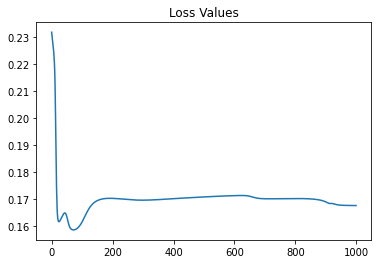

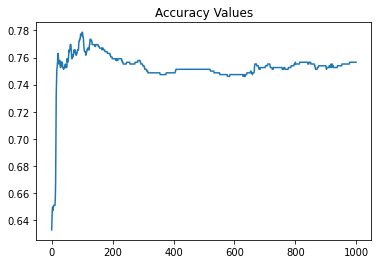

In [29]:
plot1 = plt.figure(1)
plt.plot(loss_values)
plt.title("Loss Values")
plt.show()

plot2 = plt.figure(2)
plt.plot(acc_values)
plt.title("Accuracy Values")
plt.show()


In [30]:
print(w_hidden1)
print(b_hidden1)
print(w_hidden2)
print(b_hidden2)
print(w_output)
print(b_output)

[[ 2.42263131  2.42263131  2.42263131  2.42263131  2.42263131  2.42263131
   2.42263131  2.42263131  2.42263131  2.42263131  2.42263131  2.42263131
   2.42263131  2.42263131  2.42263131  2.42263131  2.42263131  2.42263131
   2.42263131  2.42263131  2.42263131  2.42263131  2.42263131  2.42263131
   2.42263131]
 [ 7.69906833  7.69906833  7.69906833  7.69906833  7.69906833  7.69906833
   7.69906833  7.69906833  7.69906833  7.69906833  7.69906833  7.69906833
   7.69906833  7.69906833  7.69906833  7.69906833  7.69906833  7.69906833
   7.69906833  7.69906833  7.69906833  7.69906833  7.69906833  7.69906833
   7.69906833]
 [-2.44392645 -2.44392645 -2.44392645 -2.44392645 -2.44392645 -2.44392645
  -2.44392645 -2.44392645 -2.44392645 -2.44392645 -2.44392645 -2.44392645
  -2.44392645 -2.44392645 -2.44392645 -2.44392645 -2.44392645 -2.44392645
  -2.44392645 -2.44392645 -2.44392645 -2.44392645 -2.44392645 -2.44392645
  -2.44392645]
 [ 5.34951494  5.34951494  5.34951494  5.34951494  5.34951494  5.34

In [31]:
def predict(data):
    HasilPredict = []
    for i in data:
      # Hidden Layer1
      o_hidden1 = np.matmul(i, w_hidden1) + b_hidden1
      o_hidden1 = sig(o_hidden1)
      # Hidden Layer2
      o_hidden2 = np.matmul(o_hidden1, w_hidden2) + b_hidden2
      o_hidden2 = sig(o_hidden2)
      # Outpur Layer
      o_output  = np.matmul(o_hidden2, w_output) + b_output
      o_output  = sig(o_output)
      HasilPredict.append(round(float(o_output)))
    return HasilPredict

In [32]:
data_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,0.058824,0.532663,0.622951,0.000000,0.000000,0.558867,0.050811,0.083333,0
759,0.352941,0.954774,0.754098,0.000000,0.000000,0.529061,0.085397,0.750000,1
760,0.117647,0.442211,0.475410,0.262626,0.018913,0.423249,0.293766,0.016667,0
761,0.529412,0.854271,0.606557,0.313131,0.000000,0.655738,0.138770,0.366667,1
762,0.529412,0.447236,0.508197,0.000000,0.000000,0.335320,0.027327,0.200000,0
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1
767,0.058824,0.467337,0.573770,0.313131,0.000000,0.453055,0.101196,0.033333,0


In [33]:
data_testing = data_test[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']].values
data_testing

array([[0.05882353, 0.53266332, 0.62295082, 0.55886736, 0.05081127],
       [0.35294118, 0.95477387, 0.75409836, 0.5290611 , 0.0853971 ],
       [0.11764706, 0.44221106, 0.47540984, 0.42324888, 0.29376601],
       [0.52941176, 0.85427136, 0.60655738, 0.6557377 , 0.13877028],
       [0.52941176, 0.44723618, 0.50819672, 0.33532042, 0.02732707],
       [0.58823529, 0.50753769, 0.62295082, 0.49031297, 0.03970965],
       [0.11764706, 0.61306533, 0.57377049, 0.54843517, 0.1118702 ],
       [0.29411765, 0.6080402 , 0.59016393, 0.390462  , 0.07130658],
       [0.05882353, 0.63316583, 0.49180328, 0.4485842 , 0.11571307],
       [0.05882353, 0.46733668, 0.57377049, 0.45305514, 0.10119556]])

In [38]:
Prediksi = predict(data_testing)
print(Prediksi)

[0, 1, 0, 1, 0, 0, 0, 0, 0, 0]


In [39]:
import ipywidgets as widgets 
from IPython.display import display

Pregnancies = widgets.Text() 
display("Pregnancies", Pregnancies)

Glucose = widgets.Text() 
display("Glucose", Glucose)

Blood_Pressure = widgets.Text() 
display("Blood Pressure", Blood_Pressure)

BMI = widgets.Text() 
display("BMI", BMI)

Diabetes_Pedigree_Function = widgets.Text() 
display("Diabetes Pedigree Function", Diabetes_Pedigree_Function)

btn = widgets.Button(description='Prediksi') 
display(btn)

def btn_eventhandler(obj): 
    result = (predict([[float(Pregnancies.value),float(Glucose.value),float(Blood_Pressure.value),float(BMI.value),float(Diabetes_Pedigree_Function.value)]])) 
    result = result[0]
    result = int(result)
    hasil = widgets.Text(str(result)) 
    display("Result", hasil) 
    print('-----------------------------------------------------')

btn.on_click(btn_eventhandler)

'Pregnancies'

Text(value='')

'Glucose'

Text(value='')

'Blood Pressure'

Text(value='')

'BMI'

Text(value='')

'Diabetes Pedigree Function'

Text(value='')

Button(description='Prediksi', style=ButtonStyle())

'Result'

Text(value='1')

-----------------------------------------------------


'Result'

Text(value='0')

-----------------------------------------------------


In [40]:
print(index_max)

100
